In [4]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.0.0
Eager mode:  True
GPU is NOT AVAILABLE


In [13]:
num_inputs = 2
num_examples = 1000
TRUE_W = [2, -3.4]
TRUE_b = 4.2
features = tf.random.normal((num_examples, num_inputs), stddev=1)
labels = TRUE_W[0] * features[:, 0] + TRUE_W[1] * features[:, 1] + TRUE_b
labels += tf.random.normal(labels.shape, stddev=0.01)

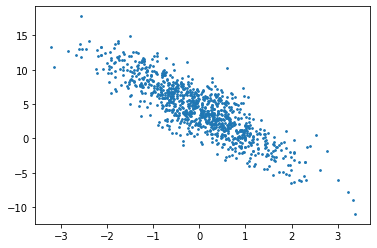

In [8]:
plt.scatter(x=features[:, 1], y=labels, s=3)

In [5]:
class LinearRegression:
    def __init__(self, inputs):
        self.Weight = tf.Variable(tf.random.normal((inputs, 1), stddev=0.01))
        self.Bias = tf.Variable(np.random.normal())

    def __call__(self, x):
        return tf.matmul(x, self.Weight) + self.Bias


def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2


def data_iter(batch_size, features, labels):
    features = np.array(features)
    labels = np.array(labels)
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = np.array(indices[i:min(i + batch_size, num_examples)])
        yield features[j], labels[j]

In [9]:
lr = 0.003
num_epochs = 10
batch_size = 10
loss = squared_loss
model = LinearRegression(num_inputs)
Weights, Biases = [], []

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape(persistent=True) as t:
            t.watch([model.Weight, model.Bias])
            real_loss = loss(model(X), y)
        for param in [model.Weight, model.Bias]:
            # param[:] = param - lr * t.gradient(l, param) / batch_size
            param.assign_sub(lr * t.gradient(real_loss, param) / batch_size)
    print('epoch %d, loss %f' % (epoch + 1, tf.reduce_mean(real_loss)))
    Weights.append(model.Weight.numpy()[0][0])
    Biases.append(model.Bias.numpy())

epoch 1, loss 7.165906
epoch 2, loss 5.058565
epoch 3, loss 1.420775
epoch 4, loss 1.041754
epoch 5, loss 0.692153
epoch 6, loss 0.204528
epoch 7, loss 0.078504
epoch 8, loss 0.097860
epoch 9, loss 0.035938
epoch 10, loss 0.012789


In [14]:
print('TRUE_W:{0}, learned_W:{1};\nTRUE_b:{2}, learned_b:{3}'.format(TRUE_W, model.Weight.numpy(), TRUE_b, model.Bias.numpy()))

TRUE_W:[2, -3.4], learned_W:[[ 1.9489479]
 [-3.2315762]];
TRUE_b:4.2, learned_b:4.050210475921631


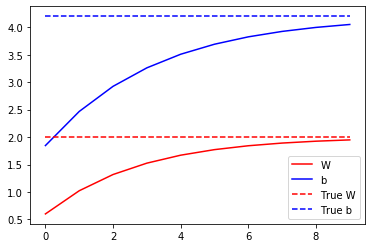

In [15]:
# Let's plot it all
plt.plot(range(num_epochs), Weights, 'r',
         range(num_epochs), Biases, 'b')
plt.plot([TRUE_W[0]] * num_epochs, 'r--',
         [TRUE_b] * num_epochs, 'b--')
plt.legend(['W', 'b', 'True W', 'True b'])
plt.show()